In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from iminuit import Minuit
# from sklearn.metrics import f1_score

In [26]:
detA = pd.read_csv("../data/DetectorA.csv", header=None, names=["event_id", "class_score", "energy"])
detB = pd.read_csv("../data/DetectorB.csv", header=None, names=["event_id", "class_score", "energy"])
detC = pd.read_csv("../data/DetectorC.csv", header=None, names=["event_id", "class_score", "energy"])
detTarget = pd.read_csv("../data/DetectorTarget.csv", header=None, names=["event_id", "class_score", "energy"])
print(detA)

       event_id  class_score    energy
0      734628.0        0.440  2123.514
1      229218.0        0.179  1017.985
2      428880.0        0.028  1862.961
3        1990.0        0.080  1619.836
4       55401.0        0.065  2611.720
...         ...          ...       ...
39995  920596.0        0.324  2278.508
39996  778459.0        0.209  2377.462
39997  484579.0        0.554  2612.247
39998  563791.0        0.018  1216.414
39999  729917.0        0.151  1944.577

[40000 rows x 3 columns]


In [28]:
detA.shape

(40000, 3)

In [29]:
detB.shape

(40000, 3)

In [30]:
detC.shape

(40000, 3)

In [27]:
detTarget.shape

(4902, 3)

In [44]:
### Generate PDF for each detector after cut
best_threshold = 0.10101010101010102
n_bins = 1000
energy_min = 1500
energy_max = 2200
n_bins = 1000  # adjust for resolution

### Applyign cut to all three detectors
detA_cut = detA[detA['class_score'] >= best_threshold]
detB_cut = detB[detB['class_score'] >= best_threshold]
detC_cut = detC[detC['class_score'] >= best_threshold]
detTarget_cut = detTarget[detTarget['class_score'] >= best_threshold]

detA_counts, bin_edges_A = np.histogram(detA_cut['energy'], bins=n_bins, range=(energy_min, energy_max))
detB_counts, bin_edges_B = np.histogram(detB_cut['energy'], bins=n_bins, range=(energy_min, energy_max))
detC_counts, bin_edges_C = np.histogram(detC_cut['energy'], bins=n_bins, range=(energy_min, energy_max))
detTarget_counts, bin_edges_D = np.histogram(detTarget_cut['energy'], bins=n_bins, range=(energy_min, energy_max))
bin_centers = 0.5 * (bin_edges_A[:-1] + bin_edges_A[1:])


In [57]:
# Bin width (same for all since bins are identical)
bin_width = bin_edges_A[1] - bin_edges_A[0]

# Convert counts → PDF
pdf_A = detA_counts / (detA_counts.sum() * bin_width)
pdf_B = detB_counts / (detB_counts.sum() * bin_width)
pdf_C = detC_counts / (detC_counts.sum() * bin_width)
# pdf_D = detTarget    / (detTarget.sum()    * bin_width)/


In [59]:
pdf_A.shape

(1000,)

In [ ]:
### Generate PDF for 0vbb

mu = 2039
sigma = 1
n_events = 10000

# Generate Monte Carlo NLDBD events
events = np.random.normal(loc=mu, scale=sigma, size=n_events)

# Use EXACT SAME BINS as your detectors
bins = bin_edges_A
bin_width = bins[1] - bins[0]

# Histogram using the same bins
counts_ovbb, _ = np.histogram(events, bins=bins)

# Normalize to PDF
pdf_ovbb = counts_ovbb / (np.sum(counts_ovbb) * bin_width)

In [62]:
import numpy as np

np.savez(
    "../data/energy_pdfs.npz",
    bin_edges=bin_edges_A,
    bin_centers=bin_centers,
    pdf_A=pdf_A,
    pdf_B=pdf_B,
    pdf_C=pdf_C,
    pdf_ovbb=pdf_ovbb,
    counts_Target=detTarget_counts,  # add Target histogram counts here
)

print("Saved to energy_pdfs.npz")


Saved to energy_pdfs.npz


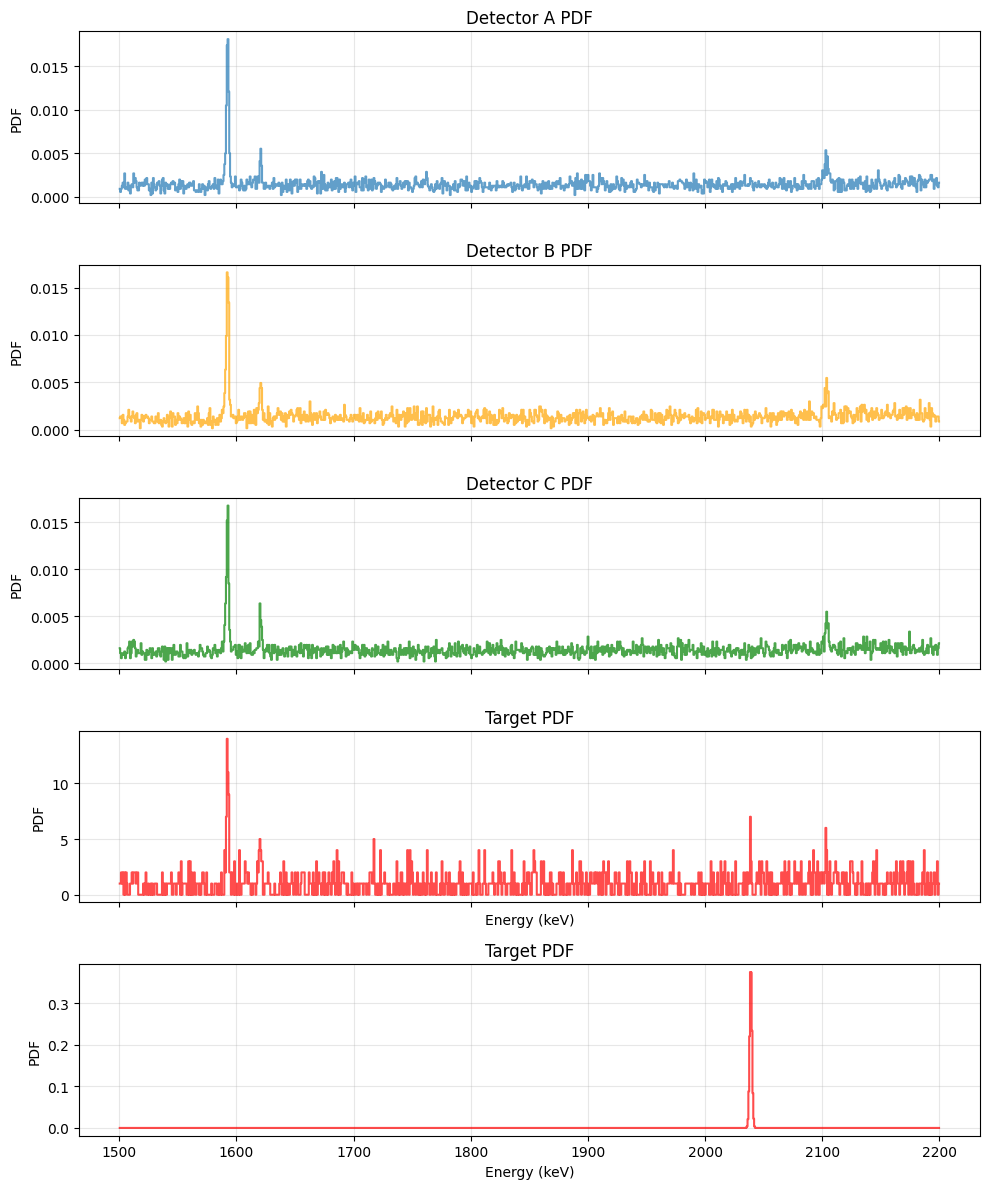

In [53]:
fig, axs = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

# Detector A
axs[0].step(bin_centers, pdf_A, where='mid', alpha=0.7)
axs[0].set_ylabel("PDF")
axs[0].set_title("Detector A PDF")
axs[0].grid(alpha=0.3)

# Detector B
axs[1].step(bin_centers, pdf_B, where='mid', alpha=0.7, color='orange')
axs[1].set_ylabel("PDF")
axs[1].set_title("Detector B PDF")
axs[1].grid(alpha=0.3)

# Detector C
axs[2].step(bin_centers, pdf_C, where='mid', alpha=0.7, color='green')
axs[2].set_ylabel("PDF")
axs[2].set_title("Detector C PDF")
axs[2].grid(alpha=0.3)

# Target
axs[3].step(bin_centers, detTarget_counts,
            where='mid', alpha=0.7, color='red')
axs[3].set_ylabel("PDF")
axs[3].set_title("Target PDF")
axs[3].set_xlabel("Energy (keV)")
axs[3].grid(alpha=0.3)

# ovbb
axs[4].step(bin_centers, pdf_ovbb,
            where='mid', alpha=0.7, color='red')
axs[4].set_ylabel("PDF")
axs[4].set_title("Target PDF")
axs[4].set_xlabel("Energy (keV)")
axs[4].grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [63]:
data = np.load("../data/energy_pdfs.npz")
pdf_A = data['pdf_A']
pdf_B  = data['pdf_B']
pdf_C = data['pdf_C']
pdf_ovbb = data['pdf_ovbb']
bin_edges = data['bin_edges']
bin_centers = data['bin_centers']
counts_Target = data['counts_Target']
